In [ ]:
# Import các thư viện cần thiết:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array

In [ ]:
# Liên kết với Google Drive:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Tạo một đối tượng ImageDataGenerator mới:
from keras.preprocessing.image import ImageDataGenerator
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Chuẩn bị dữ liệu huấn luyện cho mô hình:
training_set=train_data.flow_from_directory('/content/drive/MyDrive/Flower_ck',target_size=(150,150), batch_size=32, class_mode='categorical')
training_set.class_indices

Found 659 images belonging to 9 classes.


{'cam tu cau': 0,
 'hoa cuc': 1,
 'hoa dam but': 2,
 'hoa danh danh': 3,
 'hoa giay': 4,
 'hoa lan': 5,
 'hoa loa ken': 6,
 'hoa mau don': 7,
 'hoa tulip': 8}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

In [ ]:
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(9,activation='softmax'))

In [ ]:
# Biên dịch
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

# Huấn luyện
train=model.fit(training_set,epochs=50,batch_size=128,verbose=1)

# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

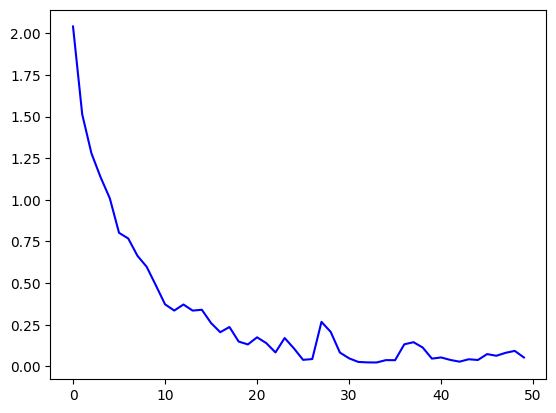

In [ ]:
#Vẽ biểu đồ thể hiện sự mất mát qua số lần train:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,loss,'b',label='Training loss')
plt.show() 

In [ ]:
# Lưu model 
model.save("/content/drive/MyDrive/cuoiki_AI_1.h5")

In [ ]:
# Load model
model_1=load_model('/content/drive/MyDrive/cuoiki_AI_1.h5')

In [ ]:
# Lưu đường dẫn folder test
folder="/content/drive/MyDrive/Flower_test"

1/1 [==============================] - 0s 21ms/step
hoa cuc


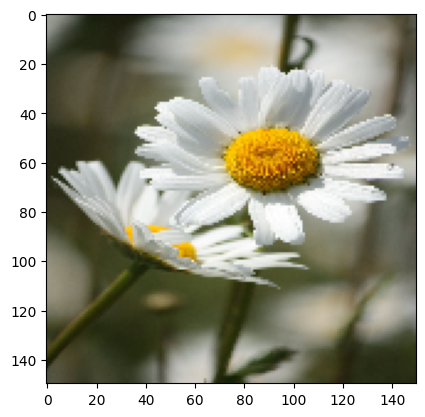

1/1 [==============================] - 0s 18ms/step
hoa cuc


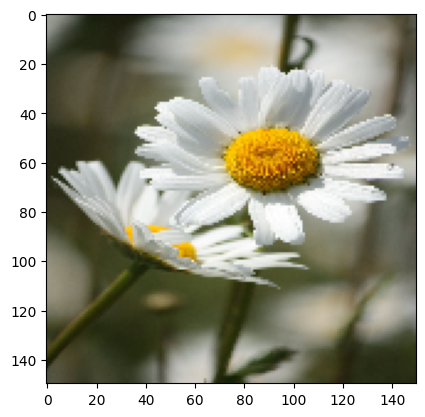

1/1 [==============================] - 0s 20ms/step
hoa cuc


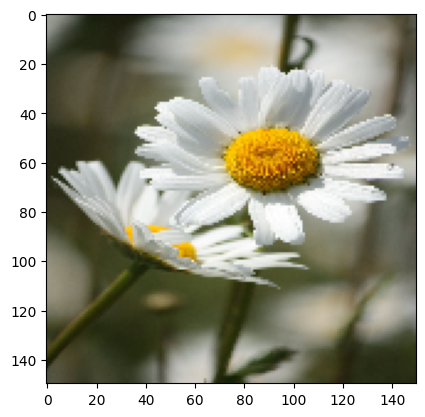

1/1 [==============================] - 0s 20ms/step
hoa cuc


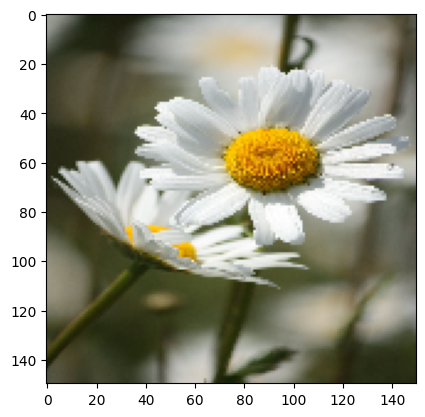

1/1 [==============================] - 0s 31ms/step
hoa cuc


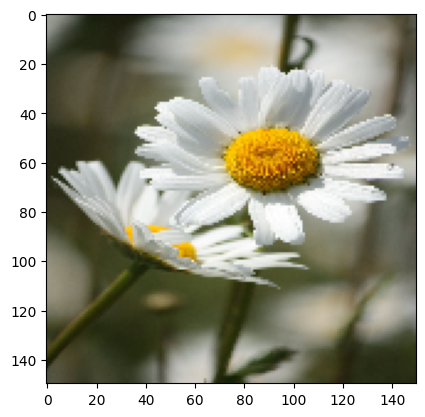

1/1 [==============================] - 0s 26ms/step
hoa cuc


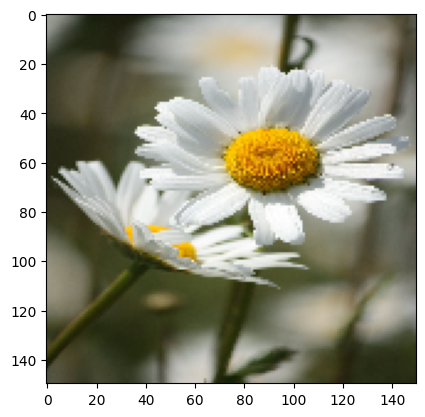

1/1 [==============================] - 0s 18ms/step
hoa cuc


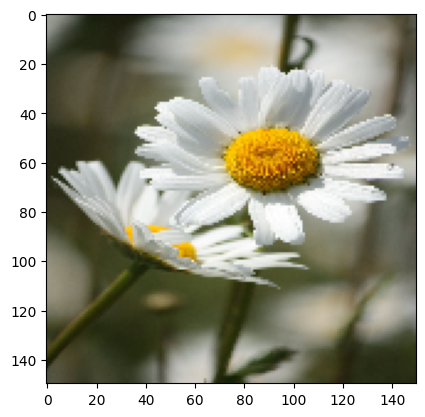

In [ ]:
for i in os.listdir(folder):
  img=load_img('/content/drive/MyDrive/Flower_test/hoa cuc 1.jpg',target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['cam tu cau','hoa cuc','hoa dam but','hoa danh danh','hoa giay','hoa lan','hoa loa ken','hoa mau don','hoa tulip']
  print(class_name[result])
  plt.show()

1/1 [==============================] - 0s 19ms/step
hoa giay


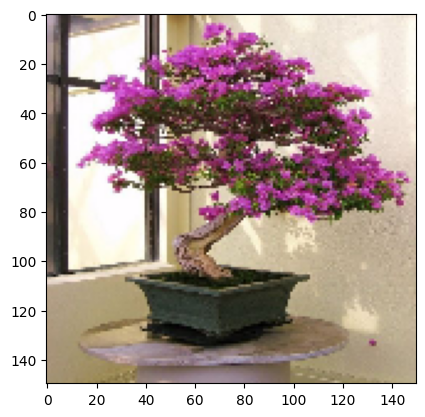

1/1 [==============================] - 0s 20ms/step
hoa giay


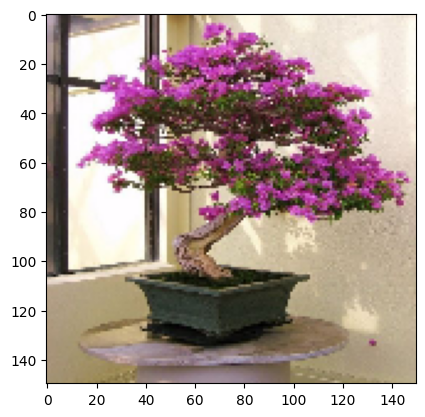

1/1 [==============================] - 0s 31ms/step
hoa giay


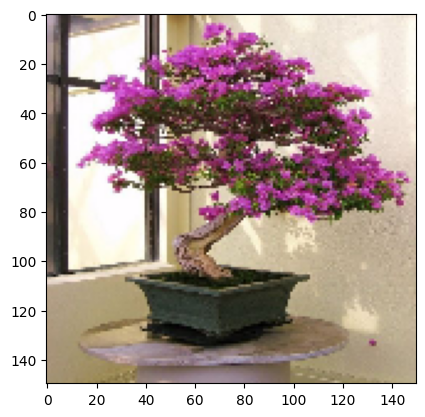

1/1 [==============================] - 0s 19ms/step
hoa giay


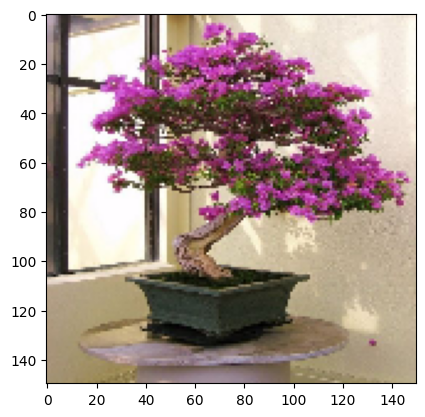

1/1 [==============================] - 0s 21ms/step
hoa giay


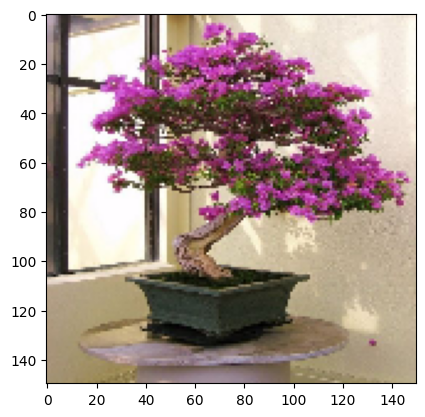

1/1 [==============================] - 0s 19ms/step
hoa giay


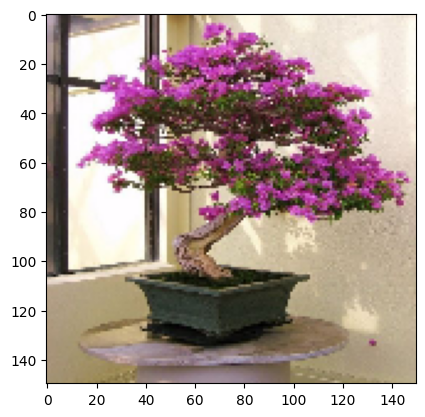

1/1 [==============================] - 0s 26ms/step
hoa giay


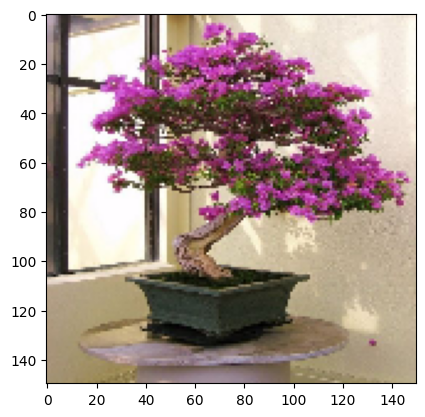

In [ ]:
for i in os.listdir(folder):
  img=load_img('/content/drive/MyDrive/Flower_test/hoa giay.jpg',target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['cam tu cau','hoa cuc','hoa dam but','hoa danh danh','hoa giay','hoa lan','hoa loa ken','hoa mau don','hoa tulip']
  print(class_name[result])
  plt.show()

1/1 [==============================] - 0s 23ms/step
cam tu cau


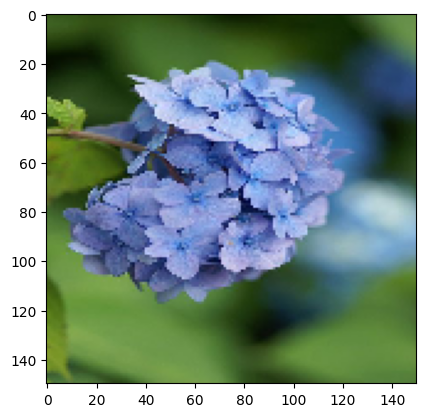

1/1 [==============================] - 0s 20ms/step
cam tu cau


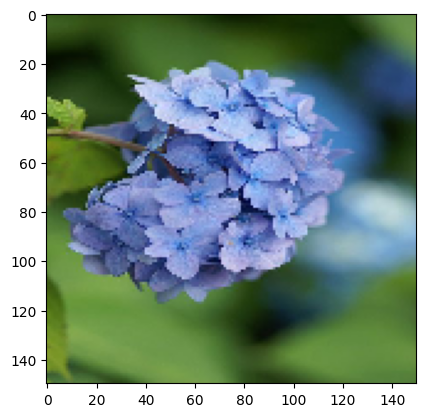

1/1 [==============================] - 0s 24ms/step
cam tu cau


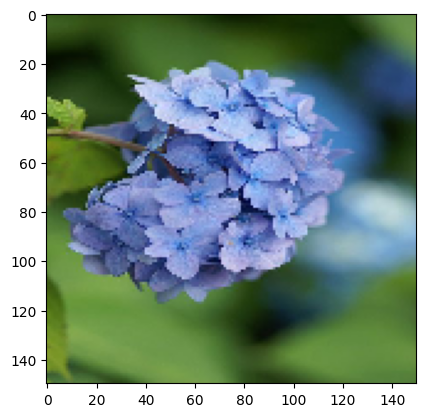

1/1 [==============================] - 0s 20ms/step
cam tu cau


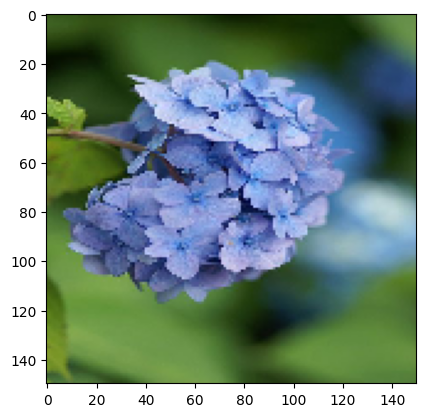

1/1 [==============================] - 0s 20ms/step
cam tu cau


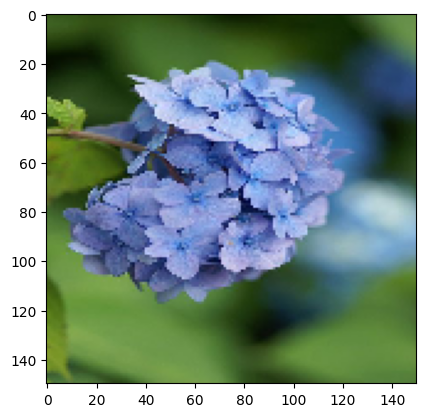

1/1 [==============================] - 0s 19ms/step
cam tu cau


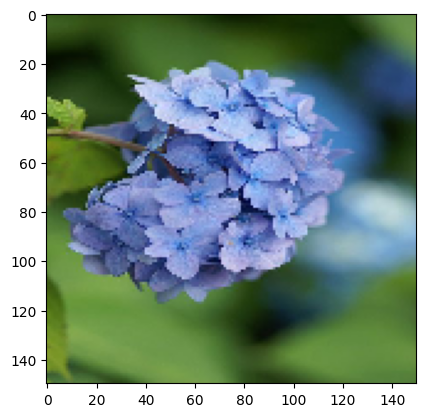

1/1 [==============================] - 0s 18ms/step
cam tu cau


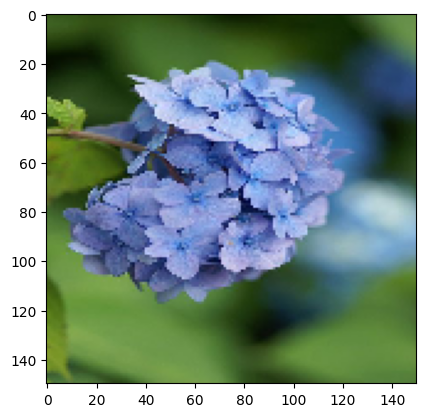

1/1 [==============================] - 0s 19ms/step
cam tu cau


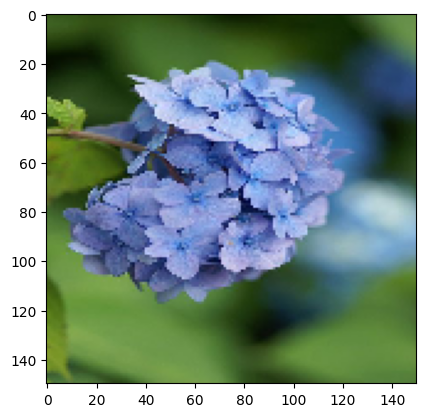

In [ ]:
for i in os.listdir(folder):
  img=load_img('/content/drive/MyDrive/Flower_test/cam tu cau.jpg',target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['cam tu cau','hoa cuc','hoa dam but','hoa danh danh','hoa giay','hoa lan','hoa loa ken','hoa mau don','hoa tulip']
  print(class_name[result])
  plt.show()